Multiple Linerr regression

As seen in simple linera regression, we used single independent variable for car price prediction.

Hower, in real world datasets, for accurate prediction of car price, we need to consider multiple features?variables instead of single one. in such scenerio multiple linear regression would be helpful


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import pandas as pd

In [3]:
data = pd.read_csv('automobileEDA.csv')
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
x = data.drop('price', axis=1) 
y = data['price']


In [5]:
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)


In [15]:
Y_train

7      18920.0
26      8558.0
144     8013.0
58     10595.0
72     16503.0
        ...   
113    17950.0
64     25552.0
15     41315.0
125    37028.0
9      16430.0
Name: price, Length: 160, dtype: float64

In [8]:
X_train

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,3.40,8.5,110.0,5500.0,19,25,12.368421,Medium,0,1
26,1,148,dodge,turbo,four,sedan,fwd,front,93.7,0.755887,...,3.39,7.6,102.0,5500.0,24,30,9.791667,Medium,0,1
144,0,85,subaru,std,four,wagon,4wd,front,96.9,0.834214,...,2.64,9.0,82.0,4800.0,23,29,10.217391,Low,0,1
58,1,129,mazda,std,two,hatchback,fwd,front,98.8,0.854397,...,3.39,8.6,84.0,4800.0,26,32,9.038462,Low,0,1
72,1,122,mercury,turbo,two,hatchback,rwd,front,102.7,0.857280,...,3.12,8.0,175.0,5000.0,19,24,12.368421,High,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,161,peugot,turbo,four,sedan,rwd,front,107.9,0.897165,...,3.52,21.0,95.0,4150.0,28,33,8.392857,Low,1,0
64,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,110.0,0.917347,...,3.64,21.5,123.0,4350.0,22,25,10.681818,Medium,1,0
15,0,122,bmw,std,two,sedan,rwd,front,103.5,0.931283,...,3.39,8.0,182.0,5400.0,16,22,14.687500,High,0,1
125,3,122,porsche,std,two,convertible,rwd,rear,89.5,0.811629,...,2.90,9.5,207.0,5900.0,17,25,13.823529,High,0,1


In [9]:
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']


In [17]:
x_train_multi = X_train[to_select].values
x_test_multi = x_test[to_select].values


In [19]:
multi_lr = LinearRegression()
multi_lr.fit(x_train_multi, Y_train)

LinearRegression()

In [21]:
y_hat_multi = multi_lr.predict(x_test_multi)
y_hat_multi[:5]

array([11105.79429764, 13917.723933  ,  5620.01234739, 13535.65296204,
        6365.75982403])

In [24]:
c = multi_lr.intercept_ # value of c in equn y = mx+c
c

-19402.318064894604

In [25]:
m = multi_lr.coef_ # value of m in equn y = mx+c
m

array([67.84826111,  4.24164899, 94.06398398, 97.20869735])

## So the equation is 
<li> complaring it with y = a0+ a1x1+ a2x2 + ......  + anxn </li>
<li>a0 = interccept value </li>
<li> a1 = coefficient of first variable taken in table and a2 is the coefficient of second variable</li>
<li> so from above equation er can conclude above equation as to get the price equation on the basis of horsepower and engine size </li>
<li> price = 39354.53- 6.481* normalized-losses - 8.45* highway-mpg</li>

## Exercise
<li>- fit multiple linear regression with [normalized-losses, highway-mpg] as independent variable to predict car price</li>

In [30]:
to_select1 = ['normalized-losses', 'highway-mpg']

x_train_multi1 = X_train[to_select1].values
x_test_multi1 = x_test[to_select1].values

In [31]:
multi_lr1 = LinearRegression()
multi_lr1.fit(x_train_multi1, Y_train)

LinearRegression()

In [32]:
y_hat_multi1 = multi_lr1.predict(x_test_multi1)
y_hat_multi[0:5]

array([11105.79429764, 13917.723933  ,  5620.01234739, 13535.65296204,
        6365.75982403])

In [33]:
multi_lr1.intercept_

40305.84385449228

In [35]:
multi_lr1.coef_ #coeff will always be same number as how much column we have passed. for eg two column in this problem i.e to_select1 = ['normalized-losses', 'highway-mpg']


array([  -1.67470415, -871.41285099])

Model evaluation using visualization

Now we have developed out simple linear regression and multiple linear regression model

how do we evaluated them?

we can evaluate our linear regression either visually or numerically

let's first evaluate our linear regression model visually using Regression Plot and Distribution Plot



[]

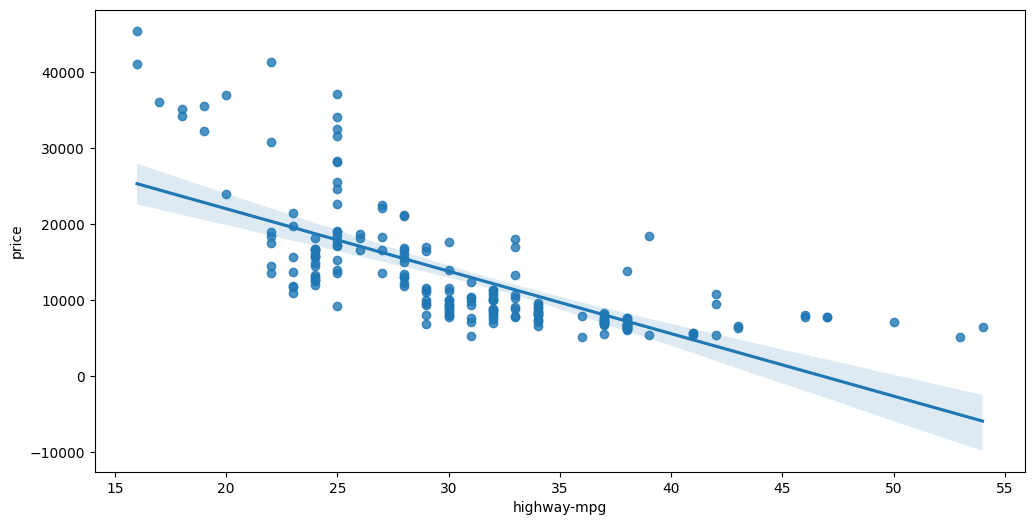

In [36]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'highway-mpg', y = 'price', data=data)
plt.plot()

[]

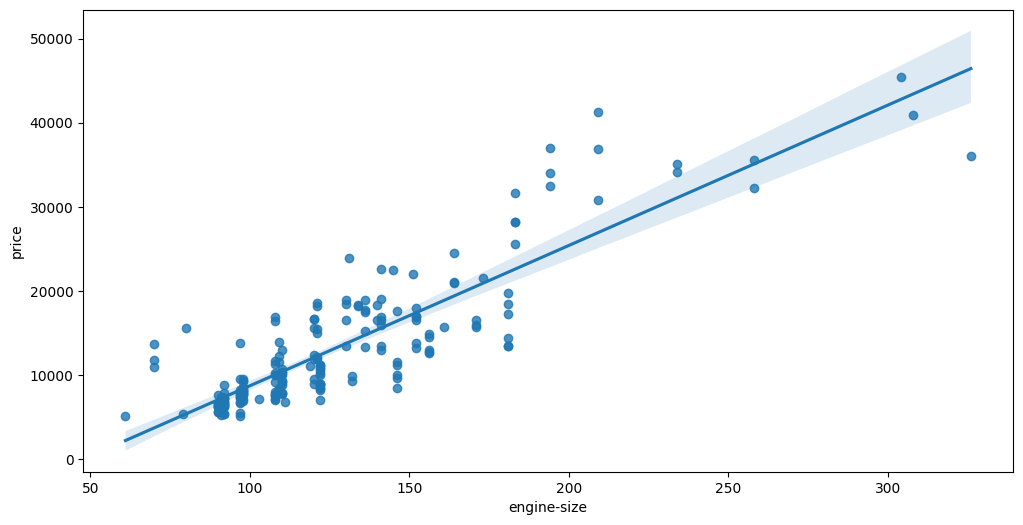

In [37]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'engine-size', y = 'price', data=data)
plt.plot()

/tmp/ipykernel_11546/4193330956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
/tmp/ipykernel_11546/4193330956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_multi, hist=False, color='b', label='Fitted V

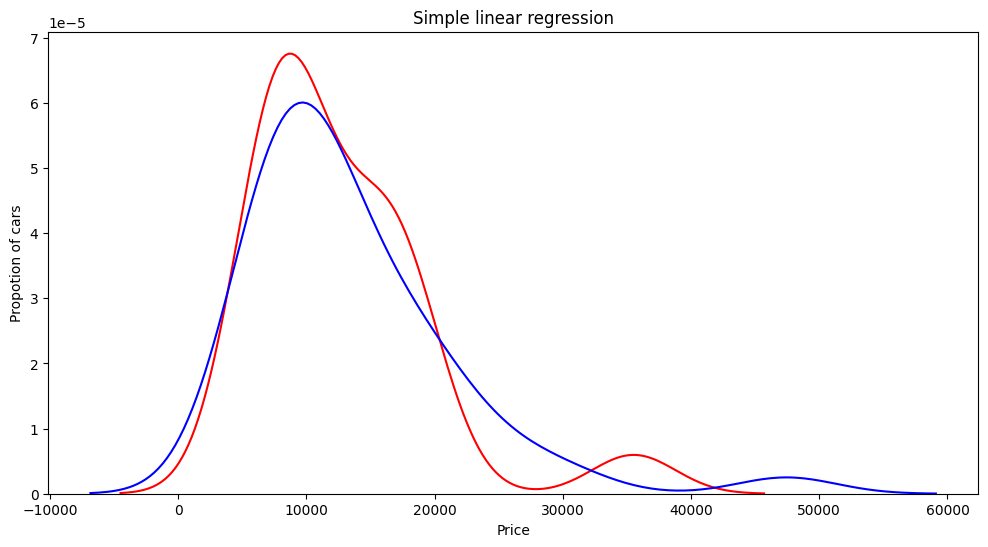

In [40]:
plt.figure(figsize=(12,6))
axl = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_hat_multi, hist=False, color='b', label='Fitted Value', ax=axl)



# plt.title('Simple linear regression actual Vs fitted values ')
plt.title('Simple linear regression')
plt.xlabel('Price')
plt.ylabel('Propotion of cars')
plt.show()

